# Candidate Test 2022 Analysis Part 1

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2).

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following  algorithms: **Decision Tree**, **Random Forest** and **Gradient Boosted Tree**, i.e. a total of 3 models are to be trained.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# Candidate Test 2022 I

alldata = pd.read_excel('alldata.xlsx')
alldata = alldata.dropna()
alldata 


,530,531,533,534,535,537,538,540,541,543,...,9a,9b,10a,10b,11a,11b,12a,12b,storkreds,alder
0,-1,-2,1,-2,2,1,-2,1,1,2,...,2,0,1,-2,-2,1,1,1,Københavns Storkreds,78
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,-2,0,-1,2,1,-2,0,0,Fyns Storkreds,64
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,-1,-2,0,2,0,-1,1,-2,Bornholms Storkreds,37
3,2,1,-2,-1,1,1,1,1,1,-2,...,-2,2,2,2,2,-1,2,0,Nordjyllands Storkreds,28
4,1,1,-2,2,-2,1,-2,1,2,-2,...,-2,0,-1,0,-2,0,2,-2,Københavns Storkreds,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1,1,1,-2,2,-1,1,-2,1,1,...,1,2,-1,2,1,-2,0,0,Københavns Omegns Storkreds,33
863,1,-2,-2,-2,1,-2,-1,-2,-2,-2,...,-1,0,-1,2,2,-2,0,0,Københavns Omegns Storkreds,45
864,1,1,1,-2,2,-1,1,-1,-1,1,...,-1,0,-1,2,2,-2,0,1,Københavns Omegns Storkreds,52
865,1,-1,1,-2,1,-1,-1,-1,-1,1,...,0,0,0,2,1,-2,1,0,Københavns Omegns Storkreds,44


In [79]:
drdata = pd.read_excel('drdata.xlsx')
drdata

,530,531,533,534,535,537,538,540,541,543,...,552,553,555,556,557,559,561,563,navn,parti
0,-1,-2,1,-2,2,1,-2,1,1,2,...,2,-2,2,2,1,2,2,-2,Lars Philipsen Prahm,Moderaterne
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,1,1,-1,-2,1,2,1,2,Karsten Hønge,Socialistisk Folkeparti
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,2,-1,-2,-1,1,2,2,2,Martin Kelleher-Petersen,Alternativet
3,2,1,-2,-1,1,1,1,1,1,-2,...,2,1,2,-2,2,2,2,2,Nicklas Gjedsig Larsen,Alternativet
4,1,1,-2,2,-2,1,-2,1,2,-2,...,2,-2,-2,-1,1,-2,-1,-2,Tom Gillesberg,Løsgænger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,1,1,1,-2,2,-1,1,-2,1,1,...,-1,1,1,-2,2,0,2,1,Maria Gudme,Socialdemokratiet
900,1,-2,-2,-2,1,-2,-1,-2,-2,-2,...,2,1,-1,-2,2,2,-1,1,Maria Durhuus,Socialdemokratiet
901,1,1,1,-2,2,-1,1,-1,-1,1,...,1,2,2,-2,1,1,1,1,Morten Bødskov,Socialdemokratiet
902,1,-1,1,-2,1,-1,-1,-1,-1,1,...,1,-1,1,-2,1,1,1,1,Jeppe Bruus,Socialdemokratiet


In [80]:
drq = pd.read_excel('drq.xlsx')
drq

,ID,Title,Question,Info,ArgumentFor,ArgumentAgainst,WordMerger,ID_CandidateQuestionType,Rule,QuestionListData
0,530,KLIMA OG ENERGI,Danmark skal bruge flere penge på at styrke to...,NaN,Den kollektive trafik bør være billig og tilgæ...,Det er dyrt for statskassen at opretholde drif...,0,1,FT,NaN
1,531,ARBEJDSMARKED OG ØKONOMI,Der skal indføres en særlig skat på de allerhø...,NaN,Historisk rammer kriser de fattigste hårdest. ...,Det danske samfund er et af de mest lige samfu...,0,1,FT,NaN
2,533,RET OG STRAF,Kriminalitet begået i udsatte boligområder ska...,NaN,Den mest effektive måde at stoppe bandekrimina...,"Det er urimeligt, at den samme forbrydelse ska...",0,1,FT,NaN
3,534,EU OG UDENRIGS,På sigt skal Danmark meldes ud af EU,NaN,"Så længe Danmark er medlem af EU, kan flertall...",Danmark er bedst tjent med at være en del af E...,0,1,FT,NaN
4,535,EU OG UDENRIGS,"Det er fornuftigt, at Danmark i de kommende år...",NaN,Ruslands angreb på Ukraine har ændret alting o...,Vi er medlemmer af Nato og har i forvejen et s...,0,1,FT,NaN
5,537,VELFÆRD,"Det er okay, at den økonomiske ulighed stiger,...",NaN,Økonomisk ulighed afspejler belønningen den en...,Større økonomisk ulighed vil skævvride samfund...,0,1,FT,NaN
6,538,UDDANNELSE,Forældres indkomst skal være et af kriterierne...,NaN,Det er vigtigt at vores gymnasier består af un...,De unge risikerer at miste pladsen på deres næ...,0,1,FT,NaN
7,540,VELFÆRD,Det skal være muligt at tjene penge på at driv...,NaN,Der er brug for en bred vifte af forskellige d...,Skattekroner tiltænkt velfærd skal ikke kunne ...,0,1,FT,NaN
8,541,ARBEJDSMARKED OG ØKONOMI,Der skal indføres skat på fortjenesten ved sal...,NaN,"Det er kun rimeligt, at man betaler skat af st...","Det er mere sikkert for alle, at boligejere be...",0,1,FT,NaN
9,543,VELFÆRD,"Det er en god idé, at dagpengesatsen for nyudd...",NaN,De fleste nyuddannede er yngre mennesker uden ...,Som nyuddannet er man ofte ved at etablere sig...,0,1,FT,NaN


In [81]:
tv2data = pd.read_excel('tv2data.xlsx')
tv2data


,1a,1b,2a,2b,3a,3b,4a,4b,5a,5b,...,10a,10b,11a,11b,12a,12b,parti,navn,storkreds,alder
0,0,1,1,1,1,-1,0,1,0,0,...,0,2,-1,2,0,0,Venstre,Birthe Tindbæk Bredo,Bornholms Storkreds,63
1,-1,1,0,-1,2,-2,-1,-1,-2,1,...,1,-1,-1,2,1,-1,Venstre,Julie Pauch Nymark,Bornholms Storkreds,27
2,-2,0,0,1,1,-1,0,1,-1,1,...,1,1,-2,2,1,1,Venstre,Peter Juel-Jensen,Bornholms Storkreds,56
3,-2,-1,2,2,2,-2,0,-1,-2,1,...,1,-1,-2,2,2,-2,Dansk Folkeparti,Mette Sode Hansen,Bornholms Storkreds,42
4,-2,-1,1,1,2,-2,1,0,-1,1,...,2,1,-1,2,0,1,Dansk Folkeparti,René Danielsson,Bornholms Storkreds,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2,2,2,2,-2,2,2,-2,-2,1,...,-1,2,-2,2,0,0,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Karina Dammand,Østjyllands Storkreds,42
958,2,2,2,2,-2,2,2,2,-2,-1,...,-2,2,-2,2,-2,-2,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Mohamed Abdikarim,Østjyllands Storkreds,33
959,2,2,2,2,-2,2,2,1,-2,0,...,1,2,-1,2,1,1,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Niko Grünfeld,Østjyllands Storkreds,47
960,1,2,2,1,-2,1,2,0,-1,0,...,2,1,-2,2,1,0,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Sara Hvidbak Grouleff,Østjyllands Storkreds,33


In [82]:
tv2q = pd.read_excel('tv2q.xlsx')
tv2q

,id,type,header,question,depends
0,bornholm-1,rate,Bornholms Storkreds,Med særligt attraktive vilkår bør staten sikre...,{'selectedArea': 'bornholms storkreds'}
1,bornholm-2,rate,Bornholms Storkreds,"Staten bør sørge for, at flytrafikken til og f...",{'selectedArea': 'bornholms storkreds'}
2,bornholm-3,rate,Bornholms Storkreds,Der skal sættes flere penge af til Forsvarets ...,{'selectedArea': 'bornholms storkreds'}
3,bornholm-4,rate,Bornholms Storkreds,Det skal være lettere at hente udenlandsk arbe...,{'selectedArea': 'bornholms storkreds'}
4,bornholm-5,rate,Bornholms Storkreds,Beslutningen om at etablere en naturnationalpa...,{'selectedArea': 'bornholms storkreds'}
...,...,...,...,...,...
69,10b,rate,Socialområdet,"Den såkaldte Arne-pension, der giver mulighed ...",NaN
70,11a,rate,Mink-sagen,Der har været alt for meget fokus på Mette Fre...,NaN
71,11b,rate,Mink-sagen,"Det bør undersøges, om Mette Frederiksen kan s...",NaN
72,12a,rate,Coronavirus,"Hvis coronasmitten stiger markant til vinter, ...",NaN


In [83]:
party_colors = {
    'Socialdemokratiet': '#E3515D',  # Social Democrats - Red
    'Venstre': '#254264',  # Venstre - Blue
    'Moderaterne': '#6FCDDF',  # Moderaterne - Light Blue
    'Socialistisk Folkeparti': '#9C1D6F',  # SF - Purple
    'Danmarksdemokraterne': '#05454F',  # Danmarksdemokraterne - Dark teal
    'Liberal Alliance': '#00FFFF',  # Liberal Alliance - Cyan
    'Det Konservative Folkeparti': '#5BC24B',  # Konservative - Green
    'Enhedslisten': '#E6801A',  # Enhedslisten - Orange
    'Radikale Venstre': '#E07EA8',  # Radikale - Pink
    'Nye Borgerlige': '#4B4B4B',  # Nye Borgerlige - Dark gray
    'Alternativet': '#00FF00',  # Alternativet - Bright green
    'Dansk Folkeparti': '#FDBB2F',  # Dansk Folkeparti - Yellow
    'Frie Grønne, Danmarks Nye Venstrefløjsparti': '#32B66A',  # Frie Grønne - Green
    'Kristendemokraterne': '#F4CE97',  # Kristendemokraterne - Beige
    'Løsgænger': '#A9A9A9'  # Independent - Gray
}



# CANDIDATE TEST 2022 ANALYSIS - PART 1

In [84]:
alldata_clean = alldata.dropna()
print(f"\n✓ Data cleaned: {alldata.shape[0] - alldata_clean.shape[0]} rows with missing values removed")
print(f"✓ Final dataset: {alldata_clean.shape}")


✓ Data cleaned: 0 rows with missing values removed
✓ Final dataset: (867, 53)


In [85]:
print("\n📋 All Data Columns:")
print(alldata_clean.columns.tolist())

print("\n📋 First few rows:")
display(alldata_clean.head())

print("\n📋 Data types:")
print(alldata_clean.dtypes)

print("\n📋 Basic statistics:")
display(alldata_clean.describe())

print("\n📋 Party distribution:")
party_counts = alldata_clean['parti'].value_counts().sort_values(ascending=False)
print(party_counts)


📋 All Data Columns:
['530', '531', '533', '534', '535', '537', '538', '540', '541', '543', '544', '545', '546', '547', '548', '550', '551', '552', '553', '555', '556', '557', '559', '561', '563', 'navn', 'parti', '1a', '1b', '2a', '2b', '3a', '3b', '4a', '4b', '5a', '5b', '6a', '6b', '7a', '7b', '8a', '8b', '9a', '9b', '10a', '10b', '11a', '11b', '12a', '12b', 'storkreds', 'alder']

📋 First few rows:


,530,531,533,534,535,537,538,540,541,543,...,9a,9b,10a,10b,11a,11b,12a,12b,storkreds,alder
0,-1,-2,1,-2,2,1,-2,1,1,2,...,2,0,1,-2,-2,1,1,1,Københavns Storkreds,78
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,-2,0,-1,2,1,-2,0,0,Fyns Storkreds,64
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,-1,-2,0,2,0,-1,1,-2,Bornholms Storkreds,37
3,2,1,-2,-1,1,1,1,1,1,-2,...,-2,2,2,2,2,-1,2,0,Nordjyllands Storkreds,28
4,1,1,-2,2,-2,1,-2,1,2,-2,...,-2,0,-1,0,-2,0,2,-2,Københavns Storkreds,58



📋 Data types:
530           int64
531           int64
533           int64
534           int64
535           int64
537           int64
538           int64
540           int64
541           int64
543           int64
544           int64
545           int64
546           int64
547           int64
548           int64
550           int64
551           int64
552           int64
553           int64
555           int64
556           int64
557           int64
559           int64
561           int64
563           int64
navn         object
parti        object
1a            int64
1b            int64
2a            int64
2b            int64
3a            int64
3b            int64
4a            int64
4b            int64
5a            int64
5b            int64
6a            int64
6b            int64
7a            int64
7b            int64
8a            int64
8b            int64
9a            int64
9b            int64
10a           int64
10b           int64
11a           int64
11b           int64
12a  

,530,531,533,534,535,537,538,540,541,543,...,8b,9a,9b,10a,10b,11a,11b,12a,12b,alder
count,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,...,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000
mean,0.378316,-0.303345,-0.489043,-1.131488,0.949250,-0.126874,-0.974625,0.410611,-0.294118,0.136101,...,0.547866,-0.340254,-0.035755,0.490196,0.366782,-0.725490,0.589389,0.657439,-0.422145,43.876586
std,1.423131,1.615893,1.529029,1.386595,1.353196,1.543086,1.332418,1.521145,1.570514,1.526494,...,0.955574,1.410381,1.013700,1.235851,1.615944,1.474442,1.603195,1.028047,1.222147,14.386282
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000
25%,-1.000000,-2.000000,-2.000000,-2.000000,1.000000,-2.000000,-2.000000,-1.000000,-2.000000,-1.000000,...,0.000000,-2.000000,-1.000000,-1.000000,-1.000000,-2.000000,-1.000000,0.000000,-2.000000,34.000000
50%,1.000000,-1.000000,-1.000000,-2.000000,1.000000,-1.000000,-2.000000,1.000000,-1.000000,1.000000,...,1.000000,-1.000000,0.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,0.000000,45.000000
75%,2.000000,1.000000,1.000000,-1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,54.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,79.000000



📋 Party distribution:
parti
Det Konservative Folkeparti                    98
Socialdemokratiet                              87
Venstre                                        84
Enhedslisten                                   74
Liberal Alliance                               70
Socialistisk Folkeparti                        70
Alternativet                                   67
Radikale Venstre                               67
Nye Borgerlige                                 51
Dansk Folkeparti                               49
Moderaterne                                    42
Kristendemokraterne                            42
Danmarksdemokraterne                           37
Frie Grønne, Danmarks Nye Venstrefløjsparti    26
Løsgænger                                       3
Name: count, dtype: int64


Age analysis by party 

In [86]:
alldata_clean = alldata[alldata['alder'] > 0].dropna() # Remove candidates with invalid ages (0 or missing)

age_by_party = alldata_clean.groupby('parti')['alder'].agg([
    ('Count', 'count'),
    ('Mean Age', 'mean'),
    ('Median Age', 'median'),
    ('Std Dev', 'std'),
    ('Min Age', 'min'),
    ('Max Age', 'max')
]).round(2)


In [87]:
age_by_party = age_by_party.sort_values('Mean Age', ascending=False)
display(age_by_party)


,Count,Mean Age,Median Age,Std Dev,Min Age,Max Age
parti,,,,,,
Danmarksdemokraterne,37,51.22,53.0,10.25,24,69
Kristendemokraterne,41,50.22,50.0,13.44,21,73
Nye Borgerlige,50,48.52,49.5,12.24,20,70
Løsgænger,3,48.00,46.0,9.17,40,58
Alternativet,65,47.42,48.0,13.62,21,79
Venstre,84,46.68,48.0,12.24,18,69
Dansk Folkeparti,49,45.53,47.0,12.19,20,75
Socialdemokratiet,85,45.39,45.0,11.64,20,78
Radikale Venstre,67,44.96,45.0,12.40,21,76


/var/folders/fj/pg_p307d3457djlbnlw5f_w00000gn/T/ipykernel_11352/1549600102.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax1.boxplot(box_data, labels=party_order, patch_artist=True,


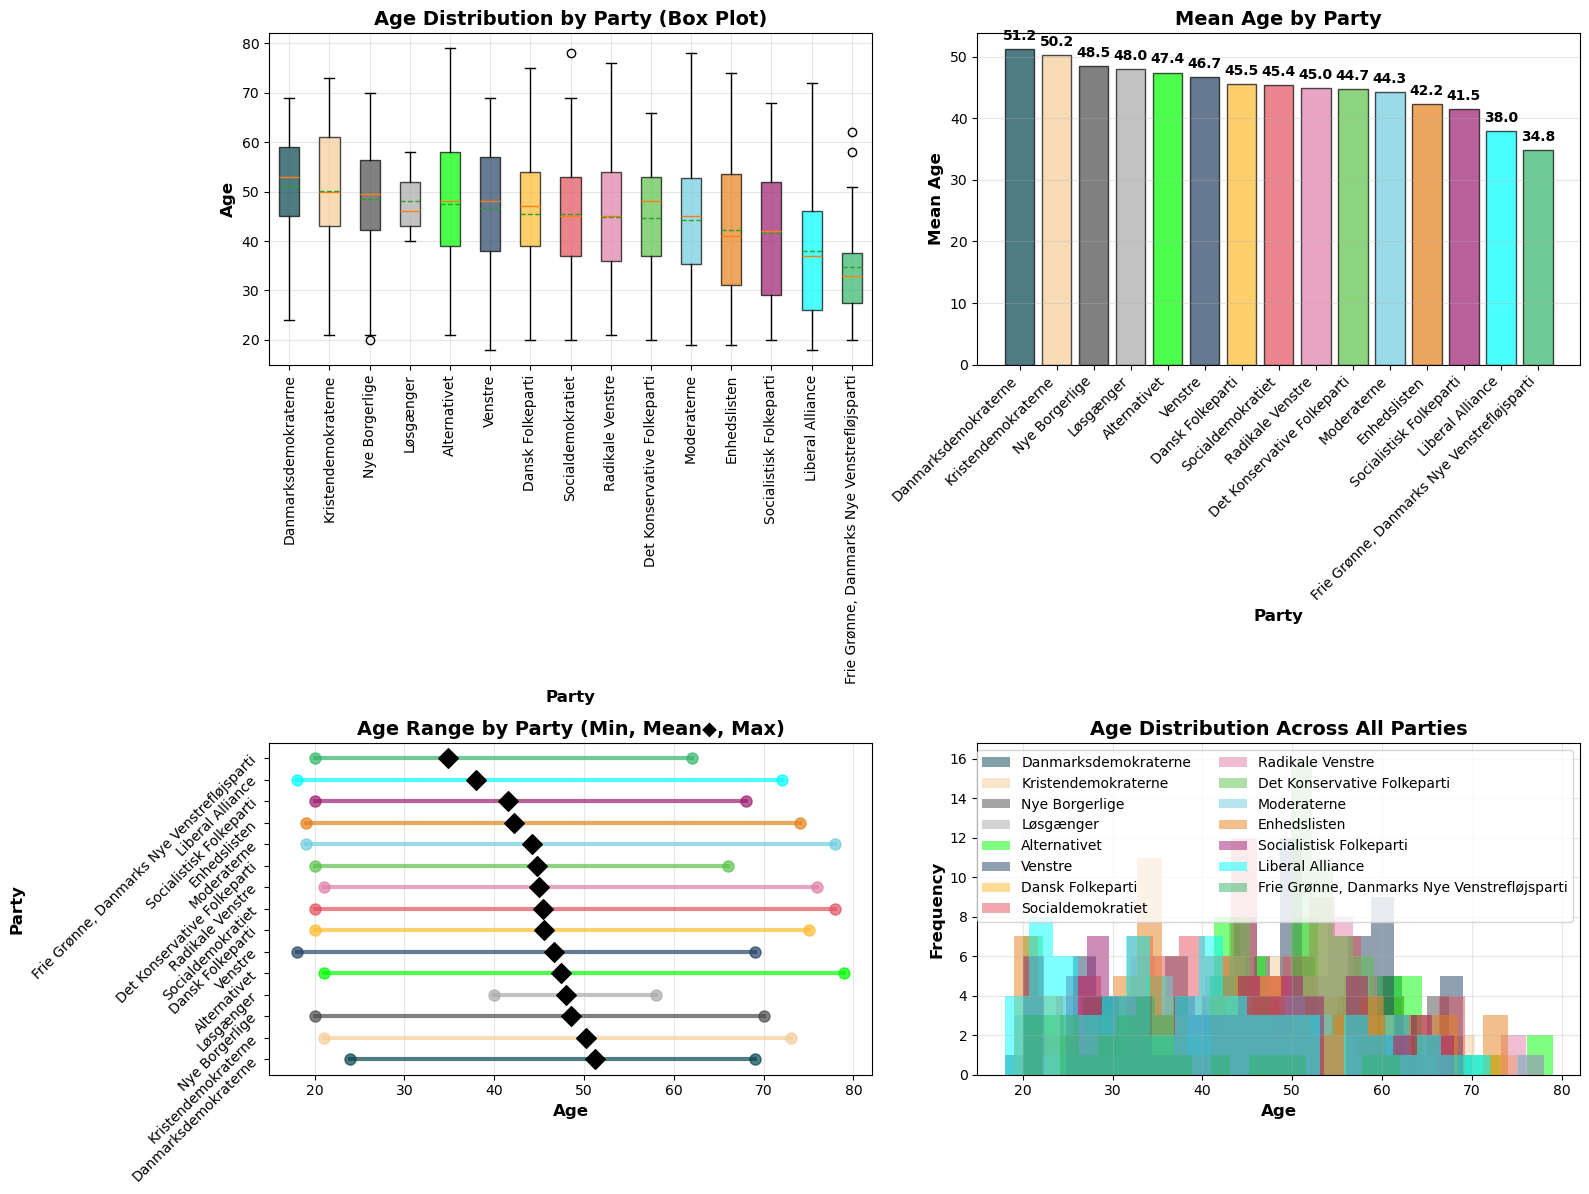

In [88]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
ax1 = axes[0, 0]
party_order = age_by_party.index.tolist()
colors = [party_colors.get(p, '#808080') for p in party_order]
box_data = [alldata_clean[alldata_clean['parti'] == party]['alder'].values 
            for party in party_order]

bp = ax1.boxplot(box_data, labels=party_order, patch_artist=True, 
                 showmeans=True, meanline=True)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax1.set_xlabel('Party', fontsize=12, fontweight='bold')
ax1.set_ylabel('Age', fontsize=12, fontweight='bold')
ax1.tick_params(axis='x', rotation=90)  # Angle the x-axis labels
ax1.set_title('Age Distribution by Party (Box Plot)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

ax2 = axes[0, 1]
ax2.bar(range(len(party_order)), age_by_party['Mean Age'], 
        color=colors, alpha=0.7, edgecolor='black')
ax2.set_xticks(range(len(party_order)))
ax2.set_xticklabels(party_order, rotation=45, ha='right', fontsize=10)
ax2.set_xlabel('Party', fontsize=12, fontweight='bold')
ax2.set_ylabel('Mean Age', fontsize=12, fontweight='bold')
ax2.set_title('Mean Age by Party', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

for i, v in enumerate(age_by_party['Mean Age']):
    ax2.text(i, v + 1, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

ax3 = axes[1, 0]
y_pos = np.arange(len(party_order))

# Plot the range (min to max) as lines
for i, party in enumerate(party_order):
    min_age = age_by_party.loc[party, 'Min Age']
    max_age = age_by_party.loc[party, 'Max Age']
    mean_age = age_by_party.loc[party, 'Mean Age']
    
    ax3.plot([min_age, max_age], [i, i], 'o-', 
             color=party_colors.get(party, '#808080'), 
             linewidth=3, markersize=8, alpha=0.7, label=party)
    ax3.scatter(mean_age, i, color='black', s=100, marker='D', zorder=5)

ax3.set_yticks(y_pos)
ax3.set_yticklabels(party_order, fontsize=10, rotation=45)
ax3.set_xlabel('Age', fontsize=12, fontweight='bold')
ax3.set_ylabel('Party', fontsize=12, fontweight='bold')
ax3.set_title('Age Range by Party (Min, Mean◆, Max)', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='x')

ax4 = axes[1, 1]
for party in party_order:
    party_ages = alldata_clean[alldata_clean['parti'] == party]['alder']
    ax4.hist(party_ages, alpha=0.5, label=party, 
             color=party_colors.get(party, '#808080'), bins=20)

ax4.set_xlabel('Age', fontsize=12, fontweight='bold')
ax4.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax4.set_title('Age Distribution Across All Parties', fontsize=14, fontweight='bold')
ax4.legend(loc='upper right', ncol=2)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Candidates confidence 

In [89]:
non_question_cols = ['navn', 'parti', 'alder', 'køn', 'kreds', 'storkreds']
question_cols = [col for col in alldata_clean.columns if col not in non_question_cols]
print(f"\n✓ Total questions analyzed: {len(question_cols)}")
print(f"✓ Question columns: {question_cols[:5]}... (showing first 5)")

confidence_data = []

for idx, row in alldata_clean.iterrows():
    candidate_name = row['navn']
    party = row['parti']
    
    # Get all responses for this candidate
    responses = row[question_cols].values
    
    # Count strong opinions (-2 or 2)
    strong_opinions = np.sum(np.abs(responses) == 2)
    total_responses = len(responses)
    
    # Calculate confidence percentage
    confidence_pct = (strong_opinions / total_responses) * 100
    
    # Also calculate breakdown
    strongly_agree = np.sum(responses == 2)
    strongly_disagree = np.sum(responses == -2)
    moderate = np.sum(np.abs(responses) == 1)
    neutral = np.sum(responses == 0)
    
    confidence_data.append({
        'Candidate': candidate_name,
        'Party': party,
        'Confidence %': confidence_pct,
        'Strong Opinions': strong_opinions,
        'Strongly Agree (2)': strongly_agree,
        'Strongly Disagree (-2)': strongly_disagree,
        'Moderate (±1)': moderate,
        'Neutral (0)': neutral,
        'Total Questions': total_responses
    })

confidence_df = pd.DataFrame(confidence_data)
confidence_df = confidence_df.sort_values('Confidence %', ascending=False)

print("\n🏆 TOP 20 MOST CONFIDENT CANDIDATES:")
display(confidence_df.head(20))


✓ Total questions analyzed: 49
✓ Question columns: ['530', '531', '533', '534', '535']... (showing first 5)

🏆 TOP 20 MOST CONFIDENT CANDIDATES:


,Candidate,Party,Confidence %,Strong Opinions,Strongly Agree (2),Strongly Disagree (-2),Moderate (±1),Neutral (0),Total Questions
493,Sarah Nørris,Enhedslisten,100.000000,49,24,25,0,0,49
87,Søren Vanting,Det Konservative Folkeparti,100.000000,49,18,31,0,0,49
547,Kim Andkjær Doberck,Nye Borgerlige,89.795918,44,22,22,1,4,49
148,Rashid Ali,"Frie Grønne, Danmarks Nye Venstrefløjsparti",87.755102,43,23,20,4,2,49
43,Mohamed Abdikarim,"Frie Grønne, Danmarks Nye Venstrefløjsparti",87.755102,43,21,22,6,0,49
427,Lone Vase Langballe,Dansk Folkeparti,85.714286,42,23,19,6,1,49
491,Jan Filbært,Enhedslisten,85.714286,42,19,23,7,0,49
351,Frank Sørensen,Dansk Folkeparti,85.714286,42,25,17,7,0,49
147,Elise Bjerkrheim,"Frie Grønne, Danmarks Nye Venstrefløjsparti",85.714286,42,23,19,6,1,49
277,John Bjerg,Nye Borgerlige,85.714286,42,18,24,4,3,49


/var/folders/fj/pg_p307d3457djlbnlw5f_w00000gn/T/ipykernel_11352/3938810757.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax1.boxplot(box_data_conf, labels=party_order_conf, patch_artist=True,


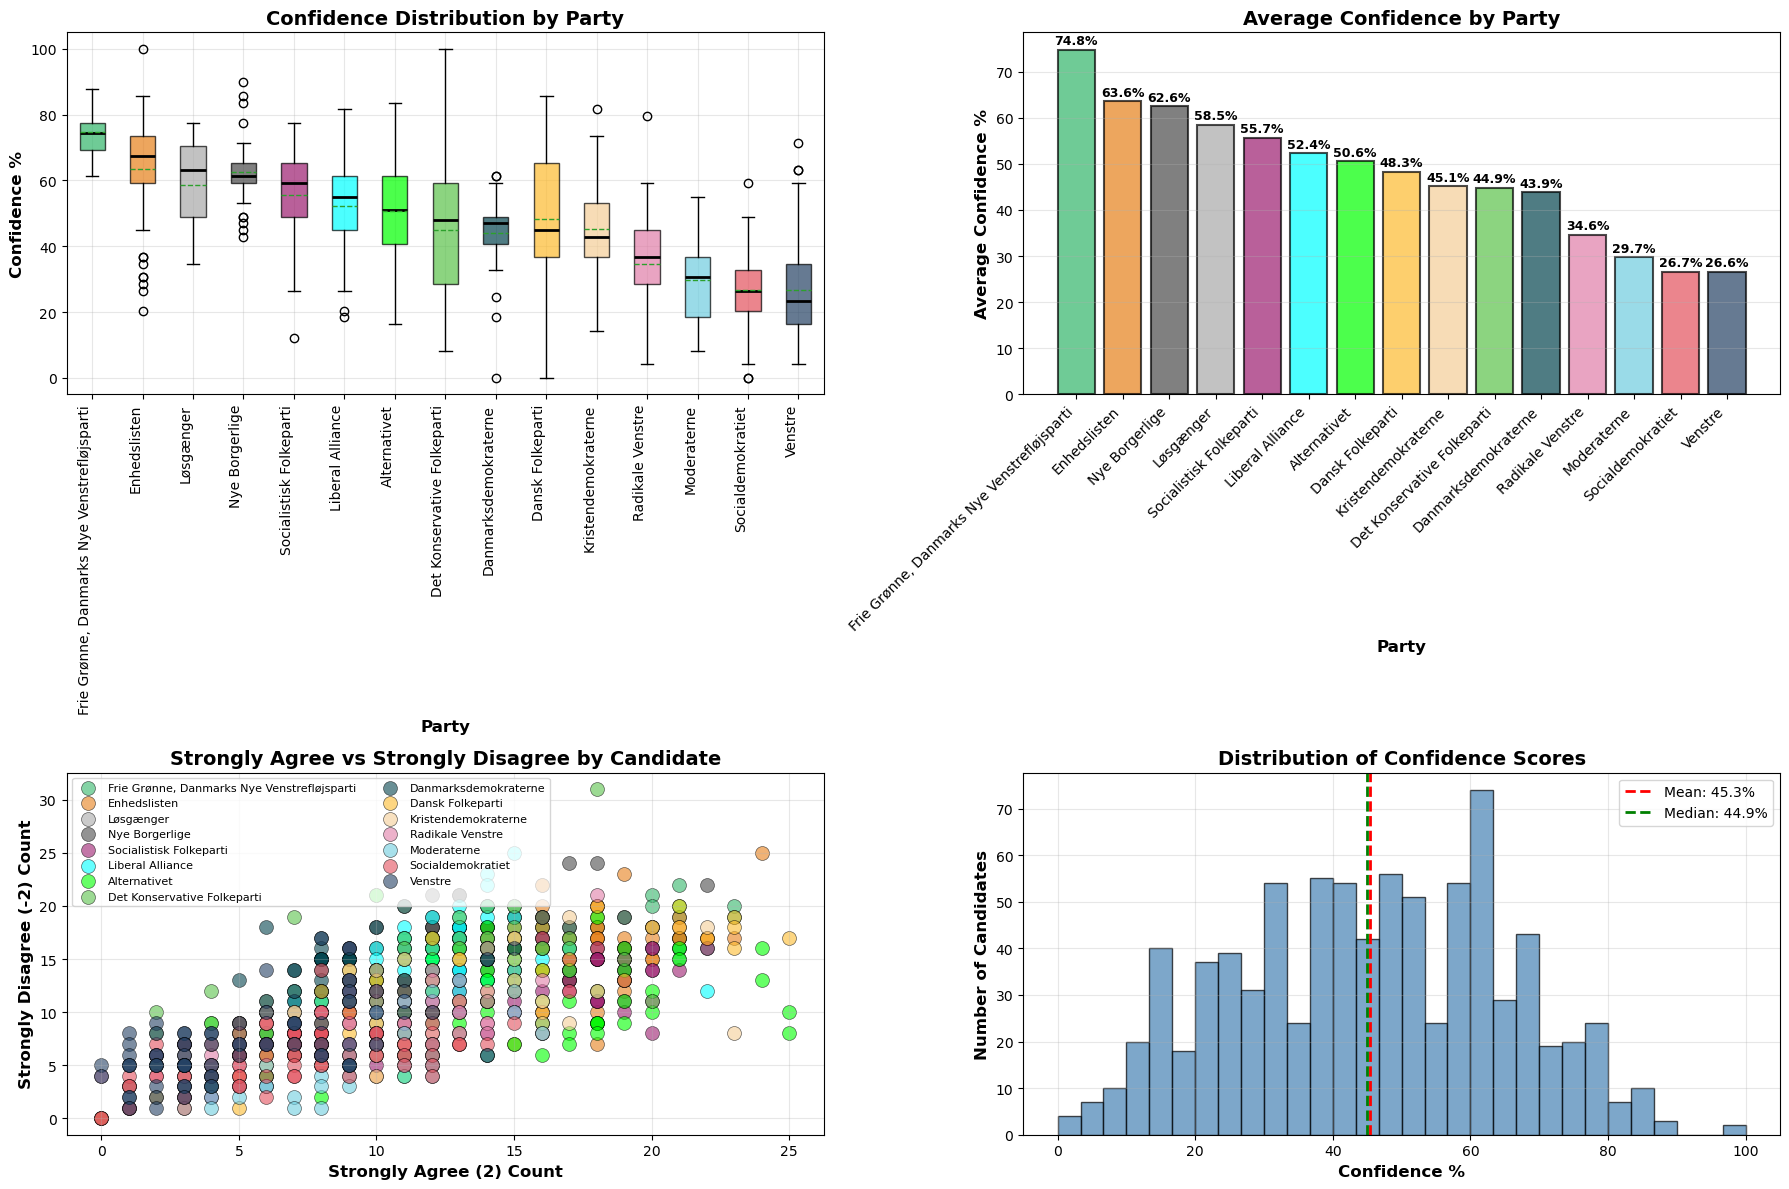

In [90]:

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
ax1 = axes[0, 0]
party_order_conf = confidence_df.groupby('Party')['Confidence %'].median().sort_values(ascending=False).index.tolist()
colors_conf = [party_colors.get(p, '#808080') for p in party_order_conf]

box_data_conf = [confidence_df[confidence_df['Party'] == party]['Confidence %'].values 
                 for party in party_order_conf]

bp = ax1.boxplot(box_data_conf, labels=party_order_conf, patch_artist=True, 
                 showmeans=True, meanline=True)

for patch, color in zip(bp['boxes'], colors_conf):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

for median in bp['medians']:
    median.set_color('black')
    median.set_linewidth(2)

ax1.set_xlabel('Party', fontsize=12, fontweight='bold')
ax1.set_ylabel('Confidence %', fontsize=12, fontweight='bold')
ax1.set_title('Confidence Distribution by Party', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90, ha='right')

##
ax2 = axes[0, 1]
party_conf_avg = confidence_df.groupby('Party')['Confidence %'].mean().sort_values(ascending=False)
colors_avg = [party_colors.get(p, '#808080') for p in party_conf_avg.index]

bars = ax2.bar(range(len(party_conf_avg)), party_conf_avg.values, 
               color=colors_avg, alpha=0.7, edgecolor='black', linewidth=1.5)

ax2.set_xticks(range(len(party_conf_avg)))
ax2.set_xticklabels(party_conf_avg.index, rotation=45, ha='right', fontsize=10)
ax2.set_xlabel('Party', fontsize=12, fontweight='bold')
ax2.set_ylabel('Average Confidence %', fontsize=12, fontweight='bold')
ax2.set_title('Average Confidence by Party', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
for i, v in enumerate(party_conf_avg.values):
    ax2.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)
##
ax3 = axes[1, 0]
for party in party_order_conf:
    party_data = confidence_df[confidence_df['Party'] == party]
    ax3.scatter(party_data['Strongly Agree (2)'], party_data['Strongly Disagree (-2)'],
                color=party_colors.get(party, '#808080'), alpha=0.6, s=100, 
                label=party, edgecolor='black', linewidth=0.5)

ax3.set_xlabel('Strongly Agree (2) Count', fontsize=12, fontweight='bold')
ax3.set_ylabel('Strongly Disagree (-2) Count', fontsize=12, fontweight='bold')
ax3.set_title('Strongly Agree vs Strongly Disagree by Candidate', fontsize=14, fontweight='bold')
ax3.legend(loc='best', ncol=2, fontsize=8)
ax3.grid(True, alpha=0.3)

##
ax4 = axes[1, 1]
ax4.hist(confidence_df['Confidence %'], bins=30, color='steelblue', alpha=0.7, edgecolor='black')
ax4.axvline(confidence_df['Confidence %'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: {confidence_df["Confidence %"].mean():.1f}%')
ax4.axvline(confidence_df['Confidence %'].median(), color='green', linestyle='--', 
            linewidth=2, label=f'Median: {confidence_df["Confidence %"].median():.1f}%')

ax4.set_xlabel('Confidence %', fontsize=12, fontweight='bold')
ax4.set_ylabel('Number of Candidates', fontsize=12, fontweight='bold')
ax4.set_title('Distribution of Confidence Scores', fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### INTER-PARTY AND INTRA-PARTY DIFFERENCES ANALYSIS

In [91]:
party_stats = []

for party in alldata_clean['parti'].unique():
    party_data = alldata_clean[alldata_clean['parti'] == party]
    
    # For each question, calculate mean and std deviation
    party_responses = party_data[question_cols].values
    
    # Calculate average standard deviation across all questions (intra-party disagreement)
    question_stds = np.std(party_responses, axis=0)
    avg_std = np.mean(question_stds)
    
    # Calculate average response (party position)
    avg_response = np.mean(party_responses)
    
    party_stats.append({
        'Party': party,
        'Avg Std Dev': avg_std,  # Higher = more internal disagreement
        'Avg Response': avg_response,
        'Candidate Count': len(party_data),
        'Max Std': np.max(question_stds),
        'Min Std': np.min(question_stds)
    })

party_disagreement_df = pd.DataFrame(party_stats)
party_disagreement_df = party_disagreement_df.sort_values('Avg Std Dev', ascending=False)

print("\n📊 INTRA-PARTY DISAGREEMENT (Internal Party Cohesion):")
print("Higher values = more internal disagreement within the party")
display(party_disagreement_df)


📊 INTRA-PARTY DISAGREEMENT (Internal Party Cohesion):
Higher values = more internal disagreement within the party


,Party,Avg Std Dev,Avg Response,Candidate Count,Max Std,Min Std
3,Løsgænger,1.184108,-0.013605,3,1.885618,0.000000
9,Kristendemokraterne,1.010180,0.181185,41,1.668193,0.520833
2,Alternativet,0.903097,0.215699,65,1.348591,0.289460
12,Det Konservative Folkeparti,0.887146,-0.063396,94,1.332296,0.144305
0,Moderaterne,0.880086,0.315841,42,1.277753,0.152455
8,Dansk Folkeparti,0.878901,0.131195,49,1.498020,0.239742
13,Radikale Venstre,0.850816,0.175754,67,1.268393,0.121254
6,Venstre,0.829693,-0.028912,84,1.288962,0.257539
14,Socialdemokratiet,0.818167,0.248739,85,1.211251,0.307687
10,Liberal Alliance,0.726966,-0.159364,68,1.278905,0.000000


In [92]:
from scipy.spatial.distance import pdist, squareform

# Calculate mean response for each party on each question
party_positions = alldata_clean.groupby('parti')[question_cols].mean()

# Calculate Euclidean distance between parties
party_distances = pdist(party_positions.values, metric='euclidean')
distance_matrix = squareform(party_distances)
distance_df = pd.DataFrame(distance_matrix, 
                           index=party_positions.index, 
                           columns=party_positions.index)
print("\n🔍 INTER-PARTY DISTANCES (How different parties are from each other):")
print("Higher values = more ideologically distant")
display(distance_df.round(2))



🔍 INTER-PARTY DISTANCES (How different parties are from each other):
Higher values = more ideologically distant


parti,Alternativet,Danmarksdemokraterne,Dansk Folkeparti,Det Konservative Folkeparti,Enhedslisten,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Kristendemokraterne,Liberal Alliance,Løsgænger,Moderaterne,Nye Borgerlige,Radikale Venstre,Socialdemokratiet,Socialistisk Folkeparti,Venstre
parti,,,,,,,,,,,,,,,
Alternativet,0.00,15.01,14.11,13.96,5.44,4.60,8.89,15.27,10.98,9.71,17.33,5.60,9.01,5.33,12.16
Danmarksdemokraterne,15.01,0.00,5.83,7.87,16.69,16.45,12.49,10.77,10.85,11.59,7.86,14.00,10.27,15.45,6.70
Dansk Folkeparti,14.11,5.83,0.00,8.12,15.63,15.94,11.10,10.41,8.82,10.66,6.79,13.64,10.30,14.79,6.84
Det Konservative Folkeparti,13.96,7.87,8.12,0.00,16.86,16.18,9.14,5.22,8.86,7.92,7.95,11.73,11.46,15.64,4.07
Enhedslisten,5.44,16.69,15.63,16.86,0.00,5.13,12.35,18.31,12.99,13.44,19.25,9.33,9.96,4.68,15.13
"Frie Grønne, Danmarks Nye Venstrefløjsparti",4.60,16.45,15.94,16.18,5.13,0.00,12.00,17.68,13.27,12.42,19.40,8.69,11.15,6.45,14.45
Kristendemokraterne,8.89,12.49,11.10,9.14,12.35,12.00,0.00,10.25,8.81,5.94,12.75,7.02,10.41,11.03,8.00
Liberal Alliance,15.27,10.77,10.41,5.22,18.31,17.68,10.25,0.00,9.49,9.03,8.27,12.74,13.83,17.46,6.45
Løsgænger,10.98,10.85,8.82,8.86,12.99,13.27,8.81,9.49,0.00,8.15,9.48,10.17,10.28,12.57,7.55


In [93]:
party_pairs = []
parties = distance_df.index.tolist()
for i in range(len(parties)):
    for j in range(i+1, len(parties)):
        party_pairs.append({
            'Party 1': parties[i],
            'Party 2': parties[j],
            'Distance': distance_df.iloc[i, j]
        })

party_pairs_df = pd.DataFrame(party_pairs).sort_values('Distance', ascending=False)

print("\n🔴 MOST DIFFERENT PARTY PAIRS (Top 10):")
display(party_pairs_df.head(10))

print("\n🟢 MOST SIMILAR PARTY PAIRS (Top 10):")
display(party_pairs_df.tail(10))


🔴 MOST DIFFERENT PARTY PAIRS (Top 10):


,Party 1,Party 2,Distance
64,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Nye Borgerlige,19.398774
55,Enhedslisten,Nye Borgerlige,19.251795
97,Nye Borgerlige,Socialistisk Folkeparti,18.490049
52,Enhedslisten,Liberal Alliance,18.311685
61,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Liberal Alliance,17.684308
82,Liberal Alliance,Socialistisk Folkeparti,17.464424
9,Alternativet,Nye Borgerlige,17.328447
39,Det Konservative Folkeparti,Enhedslisten,16.863566
16,Danmarksdemokraterne,Enhedslisten,16.691812
17,Danmarksdemokraterne,"Frie Grønne, Danmarks Nye Venstrefløjsparti",16.446500



🟢 MOST SIMILAR PARTY PAIRS (Top 10):


,Party 1,Party 2,Distance
71,Kristendemokraterne,Moderaterne,5.941933
14,Danmarksdemokraterne,Dansk Folkeparti,5.832410
10,Alternativet,Radikale Venstre,5.595110
3,Alternativet,Enhedslisten,5.444120
12,Alternativet,Socialistisk Folkeparti,5.334812
42,Det Konservative Folkeparti,Liberal Alliance,5.220631
50,Enhedslisten,"Frie Grønne, Danmarks Nye Venstrefløjsparti",5.129341
58,Enhedslisten,Socialistisk Folkeparti,4.684383
4,Alternativet,"Frie Grønne, Danmarks Nye Venstrefløjsparti",4.600045
49,Det Konservative Folkeparti,Venstre,4.068801


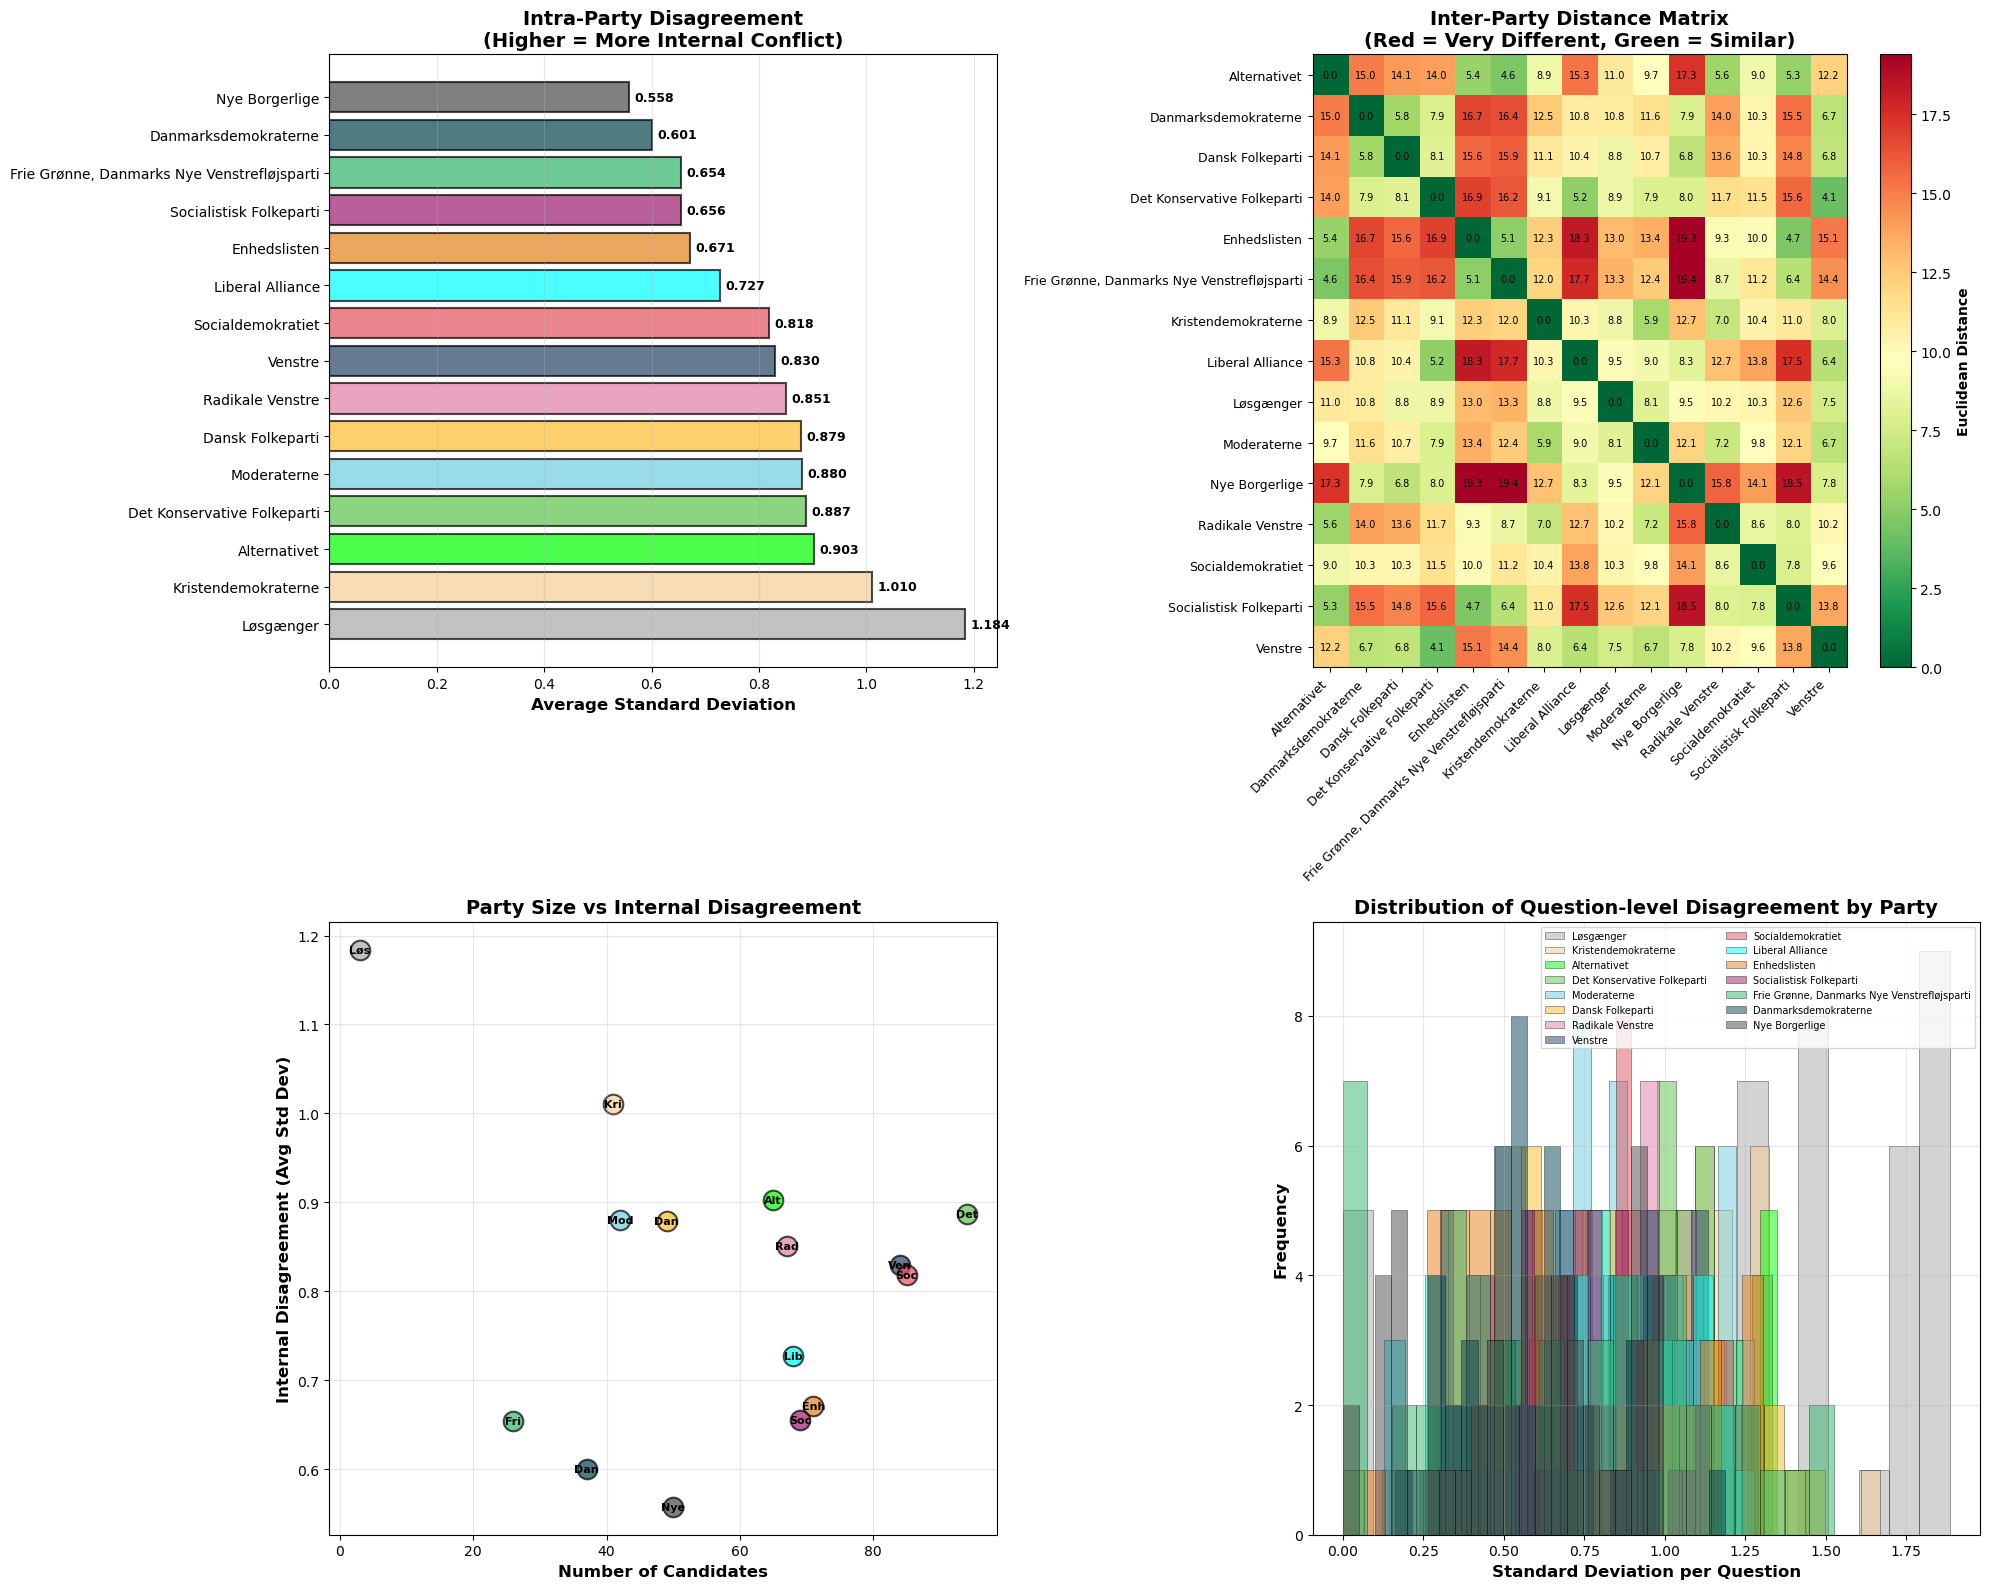

In [94]:

fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. Intra-party disagreement bar chart
ax1 = axes[0, 0]
party_order_dis = party_disagreement_df.sort_values('Avg Std Dev', ascending=False)
colors_dis = [party_colors.get(p, '#808080') for p in party_order_dis['Party']]

bars = ax1.barh(range(len(party_order_dis)), party_order_dis['Avg Std Dev'], 
                color=colors_dis, alpha=0.7, edgecolor='black', linewidth=1.5)

ax1.set_yticks(range(len(party_order_dis)))
ax1.set_yticklabels(party_order_dis['Party'], fontsize=10)
ax1.set_xlabel('Average Standard Deviation', fontsize=12, fontweight='bold')
ax1.set_title('Intra-Party Disagreement\n(Higher = More Internal Conflict)', 
              fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

for i, v in enumerate(party_order_dis['Avg Std Dev']):
    ax1.text(v + 0.01, i, f'{v:.3f}', va='center', fontweight='bold', fontsize=9)

# 2. Heatmap of inter-party distances
ax2 = axes[0, 1]
im = ax2.imshow(distance_df.values, cmap='RdYlGn_r', aspect='auto')
ax2.set_xticks(range(len(distance_df)))
ax2.set_yticks(range(len(distance_df)))
ax2.set_xticklabels(distance_df.columns, rotation=45, ha='right', fontsize=9)
ax2.set_yticklabels(distance_df.index, fontsize=9)
ax2.set_title('Inter-Party Distance Matrix\n(Red = Very Different, Green = Similar)', 
              fontsize=14, fontweight='bold')

# Add colorbar
cbar = plt.colorbar(im, ax=ax2)
cbar.set_label('Euclidean Distance', fontsize=10, fontweight='bold')

# Add values to cells
for i in range(len(distance_df)):
    for j in range(len(distance_df)):
        text = ax2.text(j, i, f'{distance_df.iloc[i, j]:.1f}',
                       ha="center", va="center", color="black", fontsize=7)

# 3. Scatter: Internal disagreement vs Party size
ax3 = axes[1, 0]
for _, row in party_disagreement_df.iterrows():
    ax3.scatter(row['Candidate Count'], row['Avg Std Dev'],
                color=party_colors.get(row['Party'], '#808080'), 
                s=200, alpha=0.7, edgecolor='black', linewidth=1.5)
    ax3.text(row['Candidate Count'], row['Avg Std Dev'], row['Party'][:3],
             ha='center', va='center', fontsize=8, fontweight='bold')

ax3.set_xlabel('Number of Candidates', fontsize=12, fontweight='bold')
ax3.set_ylabel('Internal Disagreement (Avg Std Dev)', fontsize=12, fontweight='bold')
ax3.set_title('Party Size vs Internal Disagreement', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

# 4. Distribution of intra-party standard deviations
ax4 = axes[1, 1]
for party in party_disagreement_df['Party']:
    party_data = alldata_clean[alldata_clean['parti'] == party]
    party_responses = party_data[question_cols].values
    question_stds = np.std(party_responses, axis=0)
    
    ax4.hist(question_stds, bins=20, alpha=0.5, 
             color=party_colors.get(party, '#808080'),
             label=party, edgecolor='black', linewidth=0.5)

ax4.set_xlabel('Standard Deviation per Question', fontsize=12, fontweight='bold')
ax4.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax4.set_title('Distribution of Question-level Disagreement by Party', 
              fontsize=14, fontweight='bold')
ax4.legend(loc='upper right', ncol=2, fontsize=7)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [95]:
age_confidence_df = confidence_df.merge(
    alldata_clean[['navn', 'alder']], 
    left_on='Candidate', 
    right_on='navn', 
    how='left'
).drop('navn', axis=1)

correlation = age_confidence_df['alder'].corr(age_confidence_df['Confidence %'])
print(f"\n📊 Correlation between Age and Confidence: {correlation:.3f}")

age_confidence_df['Age Group'] = pd.cut(age_confidence_df['alder'], 
                                         bins=[0, 30, 40, 50, 60, 100],
                                         labels=['18-30', '31-40', '41-50', '51-60', '60+'])

age_group_stats = age_confidence_df.groupby('Age Group')['Confidence %'].agg([
    ('Mean Confidence', 'mean'),
    ('Median Confidence', 'median'),
    ('Std Dev', 'std'),
    ('Count', 'count')
]).round(2)

print("\n📊 CONFIDENCE BY AGE GROUP:")
display(age_group_stats)


📊 Correlation between Age and Confidence: -0.018

📊 CONFIDENCE BY AGE GROUP:


/var/folders/fj/pg_p307d3457djlbnlw5f_w00000gn/T/ipykernel_11352/434095011.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = age_confidence_df.groupby('Age Group')['Confidence %'].agg([


,Mean Confidence,Median Confidence,Std Dev,Count
Age Group,,,,
18-30,47.81,47.96,18.92,148
31-40,44.44,44.90,20.52,161
41-50,44.03,44.90,20.15,242
51-60,45.03,44.90,19.48,203
60+,47.07,44.90,18.16,97


In [96]:
party_age_cohesion = age_by_party.merge(
    party_disagreement_df[['Party', 'Avg Std Dev', 'Candidate Count']], 
    left_index=True, 
    right_on='Party',
    how='inner'
)
age_cohesion_corr = party_age_cohesion['Mean Age'].corr(party_age_cohesion['Avg Std Dev'])
print(f"\n📊 Correlation between Party Mean Age and Internal Disagreement: {age_cohesion_corr:.3f}")



📊 Correlation between Party Mean Age and Internal Disagreement: 0.321


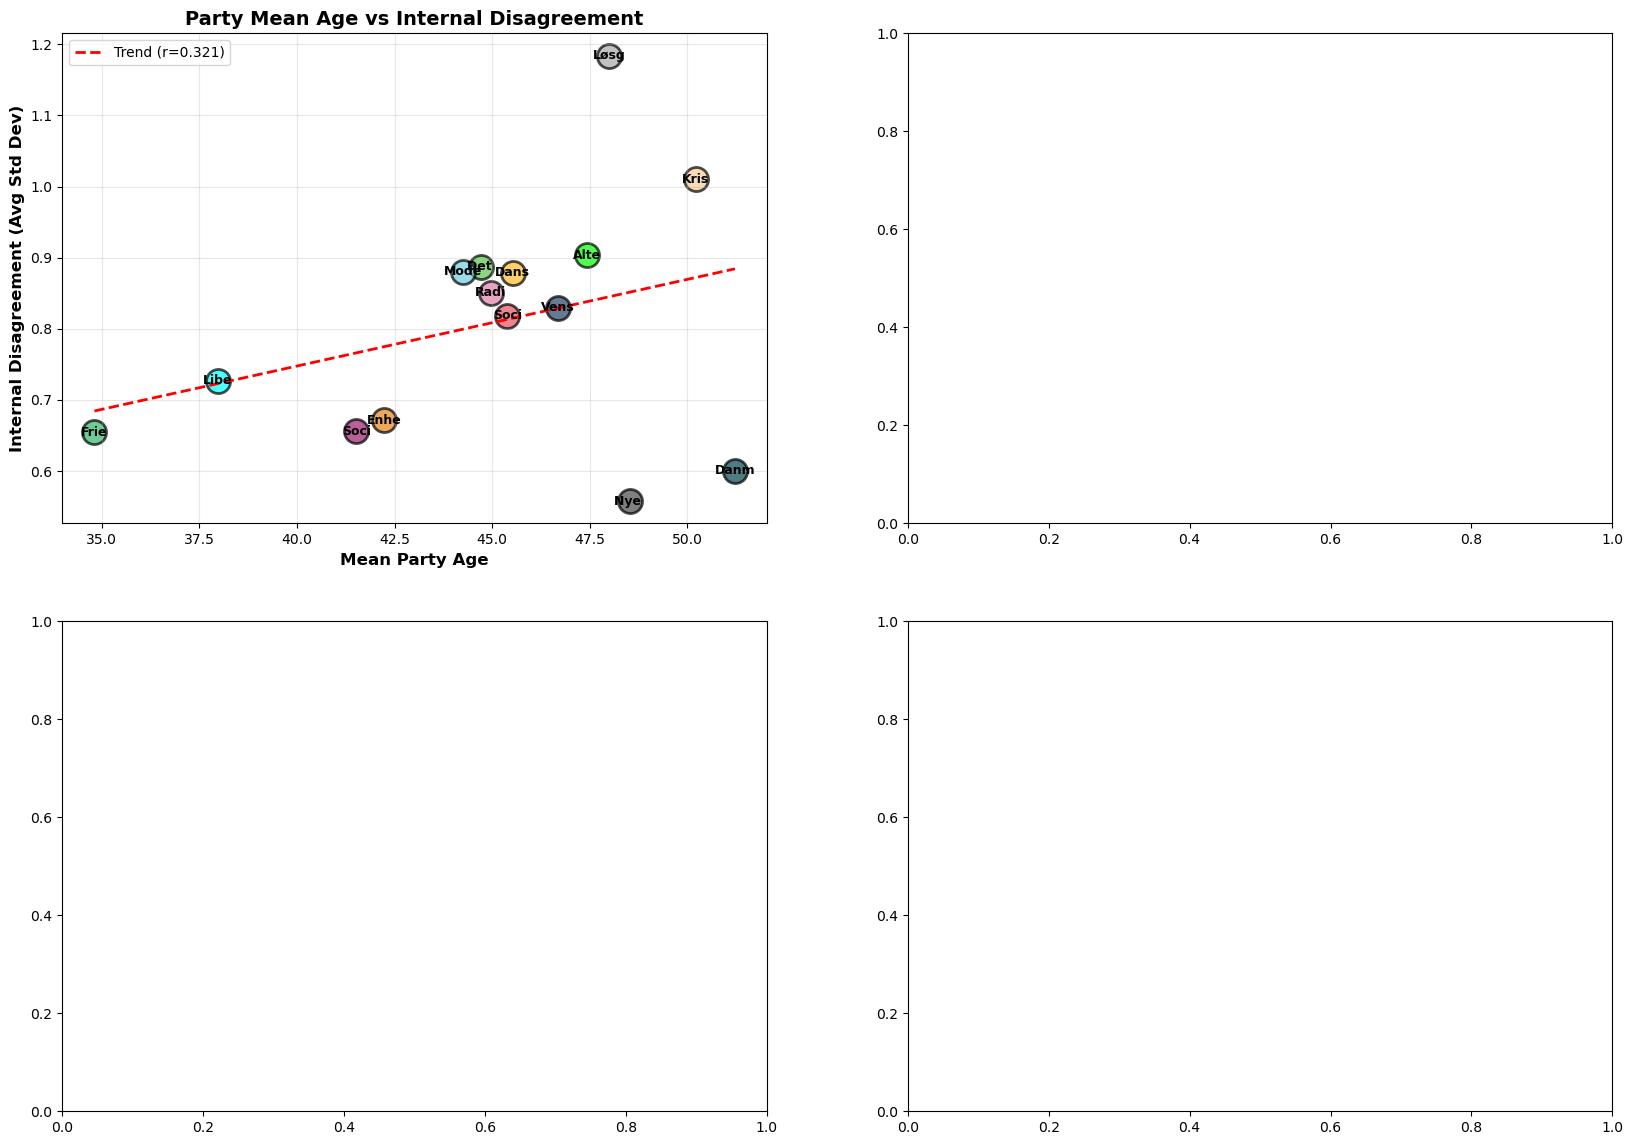

In [97]:
fig, axes = plt.subplots(2, 2, figsize=(20, 14))

# 1. Scatter: Mean Party Age vs Internal Disagreement
ax1 = axes[0, 0]
for _, row in party_age_cohesion.iterrows():
    ax1.scatter(row['Mean Age'], row['Avg Std Dev'],
                color=party_colors.get(row['Party'], '#808080'), 
                s=300, alpha=0.7, edgecolor='black', linewidth=2)
    ax1.text(row['Mean Age'], row['Avg Std Dev'], row['Party'][:4],
             ha='center', va='center', fontsize=9, fontweight='bold')

z = np.polyfit(party_age_cohesion['Mean Age'], party_age_cohesion['Avg Std Dev'], 1)
p = np.poly1d(z)
ax1.plot(sorted(party_age_cohesion['Mean Age']), 
         p(sorted(party_age_cohesion['Mean Age'])),
         "r--", linewidth=2, label=f'Trend (r={age_cohesion_corr:.3f})')

ax1.set_xlabel('Mean Party Age', fontsize=12, fontweight='bold')
ax1.set_ylabel('Internal Disagreement (Avg Std Dev)', fontsize=12, fontweight='bold')
ax1.set_title('Party Mean Age vs Internal Disagreement', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)




# Models 

In [98]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Features: all question responses
X = alldata_clean[question_cols].values
print(f"✓ Features shape: {X.shape}")

# Target: party affiliation
y = alldata_clean['parti'].values
print(f"✓ Target shape: {y.shape}")

✓ Features shape: (851, 49)
✓ Target shape: (851,)


In [99]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
party_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"\n📋 Party encoding mapping:")
for party, code in sorted(party_mapping.items(), key=lambda x: x[1]):
    print(f"   {code}: {party}")

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


📋 Party encoding mapping:
   0: Alternativet
   1: Danmarksdemokraterne
   2: Dansk Folkeparti
   3: Det Konservative Folkeparti
   4: Enhedslisten
   5: Frie Grønne, Danmarks Nye Venstrefløjsparti
   6: Kristendemokraterne
   7: Liberal Alliance
   8: Løsgænger
   9: Moderaterne
   10: Nye Borgerlige
   11: Radikale Venstre
   12: Socialdemokratiet
   13: Socialistisk Folkeparti
   14: Venstre


In [ ]:
## Decision tree 
dt_model = DecisionTreeClassifier(random_state=42, max_depth=8, min_samples_split=5)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"\n📈 Decision Tree Accuracy: {accuracy_dt:.3f}")


📈 Decision Tree Accuracy: 0.743


In [101]:
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_, zero_division=0))



📊 Classification Report:
                                             precision    recall  f1-score   support

                               Alternativet       0.60      0.69      0.64        13
                       Danmarksdemokraterne       0.86      0.86      0.86         7
                           Dansk Folkeparti       0.67      0.40      0.50        10
                Det Konservative Folkeparti       0.68      0.79      0.73        19
                               Enhedslisten       0.82      1.00      0.90        14
Frie Grønne, Danmarks Nye Venstrefløjsparti       0.50      0.20      0.29         5
                        Kristendemokraterne       0.50      0.38      0.43         8
                           Liberal Alliance       0.77      0.71      0.74        14
                                  Løsgænger       0.00      0.00      0.00         1
                                Moderaterne       1.00      0.88      0.93         8
                             Nye Borge

In [102]:
# Feature importance
feature_importance_dt = pd.DataFrame({
    'Feature': question_cols,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n🔝 Top 10 Most Important Questions (Decision Tree):")
display(feature_importance_dt.head(10))



🔝 Top 10 Most Important Questions (Decision Tree):


,Feature,Importance
20,556,0.149886
3,534,0.119700
13,547,0.105045
35,6a,0.095030
46,11b,0.075633
12,546,0.055888
9,543,0.051950
22,559,0.048307
48,12b,0.031758
4,535,0.027840


Random forest

In [103]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"\n✓ Random Forest Accuracy: {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_, zero_division=0))

# Feature importance
feature_importance_rf = pd.DataFrame({
    'Feature': question_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n🔝 Top 10 Most Important Questions (Random Forest):")
display(feature_importance_rf.head(10))


✓ Random Forest Accuracy: 0.9064 (90.64%)

📊 Classification Report:
                                             precision    recall  f1-score   support

                               Alternativet       0.86      0.92      0.89        13
                       Danmarksdemokraterne       1.00      1.00      1.00         7
                           Dansk Folkeparti       0.90      0.90      0.90        10
                Det Konservative Folkeparti       0.85      0.89      0.87        19
                               Enhedslisten       0.88      1.00      0.93        14
Frie Grønne, Danmarks Nye Venstrefløjsparti       1.00      0.40      0.57         5
                        Kristendemokraterne       1.00      0.88      0.93         8
                           Liberal Alliance       0.92      0.86      0.89        14
                                  Løsgænger       0.00      0.00      0.00         1
                                Moderaterne       1.00      1.00      1.00      

,Feature,Importance
3,534,0.058834
20,556,0.055649
46,11b,0.041762
1,531,0.041109
13,547,0.041042
44,10b,0.038546
35,6a,0.037540
4,535,0.033138
45,11a,0.030364
37,7a,0.030112


Gradient boosted tree

In [104]:
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"\n✓ Gradient Boosted Tree Accuracy: {gb_accuracy:.4f} ({gb_accuracy*100:.2f}%)")

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_gb, target_names=le.classes_, zero_division=0))

# Feature importance
feature_importance_gb = pd.DataFrame({
    'Feature': question_cols,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n🔝 Top 10 Most Important Questions (Gradient Boosted Tree):")
display(feature_importance_gb.head(10))


✓ Gradient Boosted Tree Accuracy: 0.8304 (83.04%)

📊 Classification Report:
                                             precision    recall  f1-score   support

                               Alternativet       0.79      0.85      0.81        13
                       Danmarksdemokraterne       1.00      1.00      1.00         7
                           Dansk Folkeparti       0.80      0.80      0.80        10
                Det Konservative Folkeparti       0.70      0.74      0.72        19
                               Enhedslisten       0.93      1.00      0.97        14
Frie Grønne, Danmarks Nye Venstrefløjsparti       1.00      0.40      0.57         5
                        Kristendemokraterne       0.83      0.62      0.71         8
                           Liberal Alliance       0.92      0.86      0.89        14
                                  Løsgænger       0.00      0.00      0.00         1
                                Moderaterne       0.62      1.00      0.

,Feature,Importance
35,6a,0.072971
13,547,0.060360
4,535,0.060333
3,534,0.058869
46,11b,0.055627
20,556,0.048755
7,540,0.045484
23,561,0.043084
2,533,0.040563
10,544,0.033971


We will now try to find candidates that may be belonging to the wrong party 

In [125]:
## Using random foret to make the predictions   

X_all = alldata_clean[question_cols].values
y_all = alldata_clean['parti'].values   
y_all_encoded = le.transform(y_all)

y_pred_rf = rf_model.predict(X_all)
y_pred_dt = dt_model.predict(X_all)
y_pred_gb = gb_model.predict(X_all)


mismatched_candidates_rf = []
for idx, (true_party_encoded, pred_party_encoded, name) in enumerate(zip(y_all_encoded, y_pred_rf, alldata_clean['navn'].values)):
    true_party_name = le.inverse_transform([true_party_encoded])[0]
    pred_party_name = le.inverse_transform([pred_party_encoded])[0]

    if true_party_encoded != pred_party_encoded:
        mismatched_candidates_rf.append({
            'Candidate': name,
            'Actual Party': true_party_name,
            'Predicted Party': pred_party_name,
            'Match': 'Mismatch'
        })
    else:
        mismatched_candidates_rf.append({
            'Candidate': name,
            'Actual Party': true_party_name,
            'Predicted Party': pred_party_name,
            'Match': 'Correct'
        })

mismatch_df_rf = pd.DataFrame(mismatched_candidates_rf)

mismatched_candidates_dt = []
for idx, (true_party_encoded, pred_party_encoded, name) in enumerate(zip(y_all_encoded, y_pred_dt, alldata_clean['navn'].values)):
    true_party_name = le.inverse_transform([true_party_encoded])[0]
    pred_party_name = le.inverse_transform([pred_party_encoded])[0]

    if true_party_encoded != pred_party_encoded:
        mismatched_candidates_dt.append({
            'Candidate': name,
            'Actual Party': true_party_name,
            'Predicted Party': pred_party_name,
            'Match': 'Mismatch'
        })
    else:
        mismatched_candidates_dt.append({
            'Candidate': name,
            'Actual Party': true_party_name,
            'Predicted Party': pred_party_name,
            'Match': 'Correct'
        })

mismatch_df_dt = pd.DataFrame(mismatched_candidates_dt)

mismatched_candidates_gb = []
for idx, (true_party_encoded, pred_party_encoded, name) in enumerate(zip(y_all_encoded, y_pred_gb, alldata_clean['navn'].values)):
    true_party_name = le.inverse_transform([true_party_encoded])[0]
    pred_party_name = le.inverse_transform([pred_party_encoded])[0]

    if true_party_encoded != pred_party_encoded:
        mismatched_candidates_gb.append({
            'Candidate': name,
            'Actual Party': true_party_name,
            'Predicted Party': pred_party_name,
            'Match': 'Mismatch'
        })
    else:
        mismatched_candidates_gb.append({
            'Candidate': name,
            'Actual Party': true_party_name,
            'Predicted Party': pred_party_name,
            'Match': 'Correct'
        })
mismatch_df_gb = pd.DataFrame(mismatched_candidates_gb)


In [128]:
wrong_party_df_rf = mismatch_df_rf[mismatch_df_rf['Match'] == 'Mismatch']
print("\n⚠️ CANDIDATES POTENTIALLY IN THE WRONG PARTY RANDOM FOREST:")
display(wrong_party_df_rf.head(20))
print(f"✓ Potentially 'wrong party': {len(wrong_party_df_rf)} candidates found by Random Forest")

wrong_party_df_dt = mismatch_df_dt[mismatch_df_dt['Match'] == 'Mismatch']
print("\n⚠️ CANDIDATES POTENTIALLY IN THE WRONG PARTY DECISION TREE:")
display(wrong_party_df_dt.head(20))
print(f"✓ Potentially 'wrong party': {len(wrong_party_df_dt)} candidates found by Decision Tree")

wrong_party_df_gb = mismatch_df_gb[mismatch_df_gb['Match'] == 'Mismatch']
print("\n⚠️ CANDIDATES POTENTIALLY IN THE WRONG PARTY GRADIENT BOOSTED TREE:")
display(wrong_party_df_gb.head(20))
print(f"✓ Potentially 'wrong party': {len(wrong_party_df_gb)} candidates found by Gradient Boosted Tree")



⚠️ CANDIDATES POTENTIALLY IN THE WRONG PARTY RANDOM FOREST:


,Candidate,Actual Party,Predicted Party,Match
8,Chresten H. Ibsen,Løsgænger,Radikale Venstre,Mismatch
12,Line Aaen,Alternativet,Enhedslisten,Mismatch
45,Kim Christiansen,Dansk Folkeparti,Nye Borgerlige,Mismatch
62,Kurt Vind Christiansen,Liberal Alliance,Venstre,Mismatch
135,Linea Søgaard-Lidell,Venstre,Det Konservative Folkeparti,Mismatch
144,Iben Kirstine Parmann,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Enhedslisten,Mismatch
218,Mette Reissmann,Socialdemokratiet,Radikale Venstre,Mismatch
244,Phillip Sperling,Venstre,Liberal Alliance,Mismatch
251,Susanne Zimmer,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Alternativet,Mismatch
318,Diana-Ester Eriksen,Det Konservative Folkeparti,Dansk Folkeparti,Mismatch


✓ Potentially 'wrong party': 16 candidates found by Random Forest

⚠️ CANDIDATES POTENTIALLY IN THE WRONG PARTY DECISION TREE:


,Candidate,Actual Party,Predicted Party,Match
4,Tom Gillesberg,Løsgænger,Kristendemokraterne,Mismatch
8,Chresten H. Ibsen,Løsgænger,Alternativet,Mismatch
9,Vinni Kjærgaard Jørgensen,Alternativet,Socialdemokratiet,Mismatch
36,Gustav Juul,Venstre,Moderaterne,Mismatch
45,Kim Christiansen,Dansk Folkeparti,Nye Borgerlige,Mismatch
61,Birgit Jakobsen,Kristendemokraterne,Liberal Alliance,Mismatch
62,Kurt Vind Christiansen,Liberal Alliance,Det Konservative Folkeparti,Mismatch
64,Michael Valentin Ilsø,Liberal Alliance,Dansk Folkeparti,Mismatch
100,Hanne Roed,Radikale Venstre,Alternativet,Mismatch
101,Mia Nybo,Radikale Venstre,Kristendemokraterne,Mismatch


✓ Potentially 'wrong party': 95 candidates found by Decision Tree

⚠️ CANDIDATES POTENTIALLY IN THE WRONG PARTY GRADIENT BOOSTED TREE:


,Candidate,Actual Party,Predicted Party,Match
8,Chresten H. Ibsen,Løsgænger,Kristendemokraterne,Mismatch
45,Kim Christiansen,Dansk Folkeparti,Det Konservative Folkeparti,Mismatch
61,Birgit Jakobsen,Kristendemokraterne,Det Konservative Folkeparti,Mismatch
62,Kurt Vind Christiansen,Liberal Alliance,Venstre,Mismatch
82,Lars Axel Nielsen,Nye Borgerlige,Moderaterne,Mismatch
121,Jonathan Ries,Alternativet,Socialistisk Folkeparti,Mismatch
135,Linea Søgaard-Lidell,Venstre,Det Konservative Folkeparti,Mismatch
151,Paw Karslund,Dansk Folkeparti,Løsgænger,Mismatch
188,Peter Stakemann,Det Konservative Folkeparti,Liberal Alliance,Mismatch
204,Emilie Normann,Radikale Venstre,Alternativet,Mismatch


✓ Potentially 'wrong party': 29 candidates found by Gradient Boosted Tree


In [129]:
print("\n🔄 MOST COMMON PARTY 'SWITCHES RANDOM FOREST':")
switches = wrong_party_df_rf.groupby(['Actual Party', 'Predicted Party']).size().reset_index(name='Count')
switches = switches.sort_values('Count', ascending=False)
display(switches.head(15))

print("\n🔄 MOST COMMON PARTY 'SWITCHES DECISION TREE':")
switches_dt = wrong_party_df_dt.groupby(['Actual Party', 'Predicted Party']).size().reset_index(name='Count')
switches_dt = switches_dt.sort_values('Count', ascending=False)
display(switches_dt.head(15))

print("\n🔄 MOST COMMON PARTY 'SWITCHES GRADIENT BOOSTED TREE':")
switches_gb = wrong_party_df_gb.groupby(['Actual Party', 'Predicted Party']).size().reset_index(name='Count')
switches_gb = switches_gb.sort_values('Count', ascending=False)
display(switches_gb.head(15))



🔄 MOST COMMON PARTY 'SWITCHES RANDOM FOREST':


,Actual Party,Predicted Party,Count
4,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Alternativet,2
11,Venstre,Det Konservative Folkeparti,2
1,Dansk Folkeparti,Nye Borgerlige,1
2,Det Konservative Folkeparti,Dansk Folkeparti,1
3,Det Konservative Folkeparti,Venstre,1
0,Alternativet,Enhedslisten,1
5,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Enhedslisten,1
6,Kristendemokraterne,Socialdemokratiet,1
8,Liberal Alliance,Venstre,1
7,Liberal Alliance,Det Konservative Folkeparti,1



🔄 MOST COMMON PARTY 'SWITCHES DECISION TREE':


,Actual Party,Predicted Party,Count
12,Det Konservative Folkeparti,Venstre,7
9,Dansk Folkeparti,Nye Borgerlige,7
47,Venstre,Det Konservative Folkeparti,6
25,Liberal Alliance,Det Konservative Folkeparti,5
13,Enhedslisten,Alternativet,3
6,Danmarksdemokraterne,Venstre,3
20,Kristendemokraterne,Det Konservative Folkeparti,3
35,Radikale Venstre,Kristendemokraterne,3
10,Det Konservative Folkeparti,Dansk Folkeparti,3
42,Socialistisk Folkeparti,Kristendemokraterne,3



🔄 MOST COMMON PARTY 'SWITCHES GRADIENT BOOSTED TREE':


,Actual Party,Predicted Party,Count
16,Radikale Venstre,Moderaterne,4
6,Det Konservative Folkeparti,Venstre,3
9,Kristendemokraterne,Det Konservative Folkeparti,2
7,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Alternativet,2
20,Venstre,Det Konservative Folkeparti,2
4,Det Konservative Folkeparti,Dansk Folkeparti,1
3,Dansk Folkeparti,Løsgænger,1
2,Dansk Folkeparti,Det Konservative Folkeparti,1
1,Alternativet,Socialistisk Folkeparti,1
0,Alternativet,Radikale Venstre,1
